# Dag de un circuito

Los diferentes pases usan el DAG del circuito para llevar a cabo los análisis. En este notebook veremos cómo dibujar el DAG de un circuito. 

Empezamos contruyendo el circuito. 

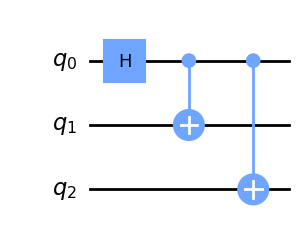

In [7]:
from qiskit import QuantumRegister, QuantumCircuit
#Creo un circuito de 3 qubits
qc=QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.draw()

El siguiente trozo de código dibuja el DAG del circuito.

**NOTA:** Para poder utilizar utilizar dag_drawer se necesita tener instalada la librería graphviz.

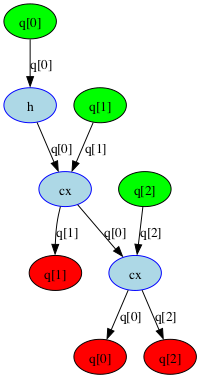

In [8]:
from qiskit.converters import circuit_to_dag
from qiskit.tools.visualization import dag_drawer

dag = circuit_to_dag(qc)
dag_drawer(dag)

Utilizamos el método op_nodes para obtener información del dag:

In [9]:
dag.op_nodes()

[DAGOpNode(op=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qargs=(Qubit(QuantumRegister(3, 'q'), 0),), cargs=()),
 DAGOpNode(op=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qargs=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1)), cargs=()),
 DAGOpNode(op=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qargs=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 2)), cargs=())]

Añadimos ahora una puerta X a la entrada en el qubit 1:

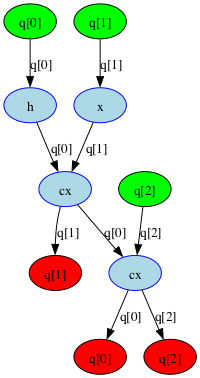

In [10]:
from qiskit.circuit.library import XGate

dag.apply_operation_front(XGate(), [dag.qubits[1]])
dag_drawer(dag)

Convertimos el dag modificado a circuito y lo dibujamos

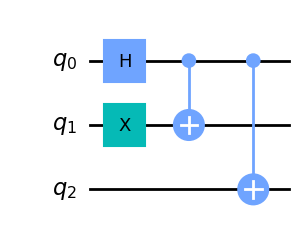

In [11]:
from qiskit.converters import dag_to_circuit

qc2 = dag_to_circuit(dag)
qc2.draw()

In [12]:
import qiskit.tools.jupyter
%qiskit_version_table